In [27]:
import pandas as pd

# Load the CSV file (correct way)
df = pd.read_csv("sales_data.csv")

# Check the data
print(df.head())



       Date  Article_ID Country_Code  Sold_Units
0  20170817        1132           AT           1
1  20170818        1132           AT           1
2  20170821        1132           AT           1
3  20170822        1132           AT           1
4  20170906        1132           AT           1


In [33]:
from prophet import Prophet
import pandas as pd

# Load CSV (if not already loaded)
df = pd.read_csv("sales_data.csv")

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

# Optional: Filter for a specific article and country (you can change these)
article_id = 1132
country_code = 'AT'
df_filtered = df[(df['Article_ID'] == article_id) & (df['Country_Code'] == country_code)]

# Group by date to get total sales per day
df_grouped = df_filtered.groupby('Date')['Sold_Units'].sum().reset_index()

# Rename columns for Prophet
df_grouped.rename(columns={'Date': 'ds', 'Sold_Units': 'y'}, inplace=True)

# Check the result
df_grouped.head()


,ds,y
0,2017-08-17,1
1,2017-08-18,1
2,2017-08-21,1
3,2017-08-22,1
4,2017-09-06,1


In [35]:
# Create a Prophet model
model = Prophet()

# Fit the model with your data
model.fit(df_grouped)

# Create future dates for prediction (e.g., next 30 days)
future = model.make_future_dataframe(periods=30)

# Make forecast
forecast = model.predict(future)

# View result
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


12:06:44 - cmdstanpy - INFO - Chain [1] start processing
12:06:44 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
270,2019-03-11,1.846792,0.202784,3.414607
271,2019-03-12,1.762019,0.226173,3.304065
272,2019-03-13,1.849968,0.386876,3.337300
273,2019-03-14,2.142877,0.578216,3.677668
274,2019-03-15,1.832314,0.308732,3.353424


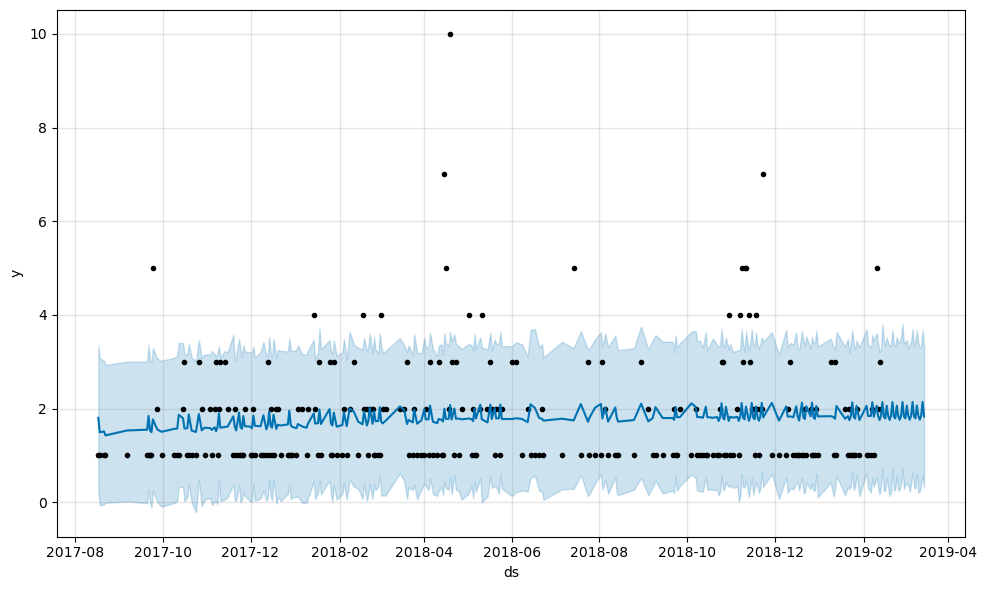

In [37]:
# Plot the forecast
fig = model.plot(forecast)


In [39]:
# Save forecast to Excel
forecast.to_excel("forecast_output.xlsx", index=False)
